In [2]:
from matplotlib import pyplot as plt
import numpy as np
import sympy
from IPython.display import display

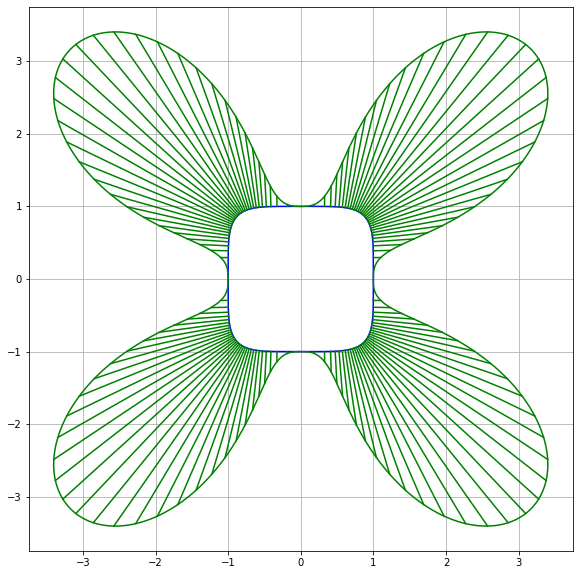

In [10]:
fig = plt.figure(figsize=(10,10))

c = fig.add_subplot(1, 1, 1)
c.grid()
c.set_aspect('equal')

# При изменении параметров необходимо вручную пересчитать производные
n = 5
a = 1
b = 1

theta = np.linspace(10e-6, np.pi/2-10e-6, 1000)

x = a * np.cos(theta)**(2/n)
y = b * np.sin(theta)**(2/n)

diffx1 = -0.4*np.sin(theta)/np.cos(theta)**(.6)
diffx2 = -0.24*np.sin(theta)**2/np.cos(theta)**(1.6) - 0.4*np.cos(theta)**.4
diffy1 = .4*np.cos(theta)/np.sin(theta)**.6
diffy2 = -.24*np.cos(theta)**2/np.sin(theta)**1.6 - .4*np.sin(theta)**.4

# Кривизна.
curv = ( diffx1*diffy2 - diffx2*diffy1 ) / ( diffx1**2 + diffy1**2 ) ** (3/2)

# Нормированный вектор нормали
x_norm = -diffy1 / np.hypot(diffx1, diffy1)
y_norm = diffx1 / np.hypot(diffx1, diffy1)

# Берём единичный вектор нормали и умножаем его на значение кривизны (кривизна - это скаляр). 
# Смещаем полученный результат на (x,y), чтобы строить кривизну от суперэллипса, а не от (0,0)
x_curv = -curv * x_norm + x
y_curv = -curv * y_norm + y

# Строим графики
c.plot(x, y, color="blue")
c.plot(-x, y, color="blue")
c.plot(-x, -y, color="blue")
c.plot(x, -y, color="blue")

c.plot(x_curv, y_curv, color="green")
c.plot(-x_curv, y_curv, color="green")
c.plot(-x_curv, -y_curv, color="green")
c.plot(x_curv, -y_curv, color="green")

# Рисуем линии нормали.
for i in range(0, len(x), 30):
    px = np.array([x[i], x_curv[i]])
    py = np.array([y[i], y_curv[i]])
    c.plot(px, py, color="green")
    c.plot(-px, py, color="green")
    c.plot(-px, -py, color="green")
    c.plot(px, -py, color="green")

#сохраняем результат
fig.savefig('ex6.pdf', format='pdf', bbox_inches='tight', pad_inches=0, dpi=300, )